# JPA Não Degenerado Simulation

In [272]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import os
from datetime import datetime
import numpy as np
import statistics as st
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from qutip import *

## Parâmetros

In [273]:
N1=75
N2=75

#lamb=1.46753*(10**9) #usando o lambda critico do artigo da roy

phi0=2.067833848 * (10**(-15)) #Wb
e=1.60217663*(10**(-19)) #C
C=2*(10**(-12)) #F capacitância do JPA
Ic=1.3*(10**-6)
#w0=6.9*(10**9)
wp=(14*(10**9))* 2 * np.pi #frequência da pump
w0=np.sqrt((2 * (np.pi) * Ic)/(phi0 * C)) #frequência do ressonador não linear



wd=w0 - (wp/2) #deve ser em GHz
F=1.2
Ej=Ic/(2*e)
Ec=(e**2)/(2*C) #energia capacitiva JJ
df=0.1
ZPF=2*(np.sqrt(Ec/w0))
Ej1=(-Ej)*df*(np.sin(F))
#lamb=Ej1*0.5*(ZPF**2)

lamb=1.46753*(10**9)


#k0=1*(10**10)
#lamb=np.sqrt((k0**2+(4*(wd**2)))/(12))
print('w0=', f"{w0:.2e}")
print('Ec=', f"{Ec:.2e}")
print('Ej=', f"{Ej:.2e}")
print('lamb=', f"{lamb:.2e}")

w0= 4.44e+10
Ec= 6.42e-27
Ej= 4.06e+12
lamb= 1.47e+09


## OPERADORES

In [274]:
a = tensor(destroy(N1), qeye(N2))
na = tensor(num(N1), qeye(N2))
b = tensor(qeye(N1), destroy(N2))
nb = tensor(qeye(N1), num(N2))

# Hamiltoniano: $H=\Delta_f(\hat a^\dagger\hat a+\hat b^\dagger\hat b)+\frac{\lambda_f}{2}(\hat a^{\dagger}\hat b^\dagger+\hat a\hat b)$

In [275]:
H=wd*(a.dag()*a+b.dag()*b)+0.5*lamb*(a.dag()*b.dag()+a*b)

In [276]:
#estado inicial
psi0 = tensor(basis(N1, 1), basis(N2, 1))

## Evolução Temporal 

In [277]:
tlist=np.linspace(0,(10*(10**-8)),100) #em ns
#tlist=np.linspace(0,15,1000)
c_ops=[]
e_ops=[]

In [278]:
output=mesolve(H, psi0, tlist, c_ops, e_ops)
output

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [279]:
na_e = np.zeros(tlist.shape)
na_s = np.zeros(tlist.shape)
nb_e = np.zeros(tlist.shape)
nb_s = np.zeros(tlist.shape)

for idx, psi in enumerate(output.states):
    na_e[idx] = expect(na, psi)
    na_s[idx] = expect(na * na, psi)
    nb_e[idx] = expect(nb, psi)
    nb_s[idx] = expect(nb * nb, psi)

# substract the average squared to obtain variances
na_s = na_s - na_e**2
nb_s = nb_s - nb_e**2

lamb= 1.47e+09 media= 15.203767666893649


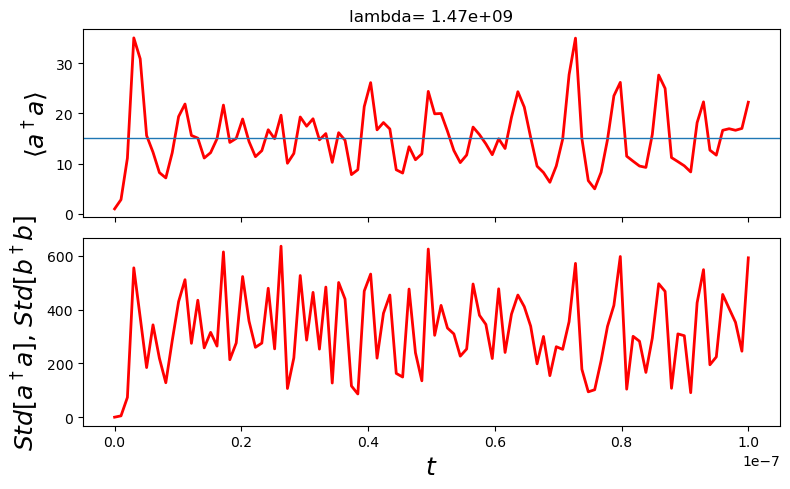

In [280]:
med=st.mean(na_e)
# Create a folder to save the plots
output_folder = 'plots/JPA SIMULATIONS PLOTS/NDPA'
os.makedirs(output_folder, exist_ok=True)

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
filename = f'plot_{timestamp}.png'
output_path = os.path.join(output_folder, filename)


fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 5))

line1 = axes[0].plot(tlist, na_e, "r", linewidth=2)
axes[0].set_ylabel(r"$\langle a^\dagger a \rangle$", fontsize=18)
axes[0].set_title('lambda= 'f"{lamb:.2e}")
line2=axes[0].axhline(y=med, linewidth=1)


line3 = axes[1].plot(tlist, na_s, "r", linewidth=2)
axes[1].set_xlabel("$t$", fontsize=18)

axes[1].set_ylabel(r"$Std[a^\dagger a]$, $Std[b^\dagger b]$", fontsize=18)


fig.tight_layout()
print('lamb=', f"{lamb:.2e}","media=",med)
# Save the plot with the unique filename
plt.savefig(output_path)